In [12]:
import tensorflow
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import load_model

Carregando o dataset

In [13]:
dataset = keras.datasets.fashion_mnist
((imagens_treino, identificacoes_treino), (imagens_teste, identificacoes_teste)) = dataset.load_data()


Exploração dos dados

In [14]:
len(imagens_treino)
imagens_treino.shape
imagens_teste.shape
len(identificacoes_teste)
identificacoes_treino.min()
identificacoes_treino.max()

9

Exibição dos dados

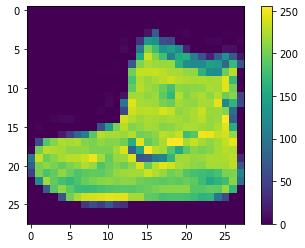

In [15]:
total_de_classificacoes = 10
nomes_de_classificacoes = ['Camiseta', 'Calça', 'Pullover', 
                           'Vestido', 'Casaco', 'Sandália', 'Camisa',
                           'Tênis', 'Bolsa', 'Bota']

plt.imshow(imagens_treino[0])
plt.colorbar()

Normalizando as imagens

In [16]:
imagens_treino = imagens_treino/float(255)

Criando, compilando, treinando e normalizando o modelo

In [23]:
modelo = keras.Sequential([ 
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(256, activation=tensorflow.nn.relu),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation=tensorflow.nn.softmax)
])

modelo.compile(optimizer='adam', 
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

historico = modelo.fit(imagens_treino, identificacoes_treino, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 2s 2ms/step - loss: 0.5286 - accuracy: 0.8121 - val_loss: 0.4250 - val_accuracy: 0.8432
Epoch 2/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3970 - accuracy: 0.8558 - val_loss: 0.3703 - val_accuracy: 0.8610
Epoch 3/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3662 - accuracy: 0.8653 - val_loss: 0.3611 - val_accuracy: 0.8711
Epoch 4/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3408 - accuracy: 0.8737 - val_loss: 0.3423 - val_accuracy: 0.8755
Epoch 5/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3249 - accuracy: 0.8802 - val_loss: 0.3459 - val_accuracy: 0.8787


Salvando e carregando o modelo treinado

In [18]:
modelo.save('modelo.h5')
modelo_salvo = load_model('modelo.h5')

Visualizando as acurácias de treino e validação por época

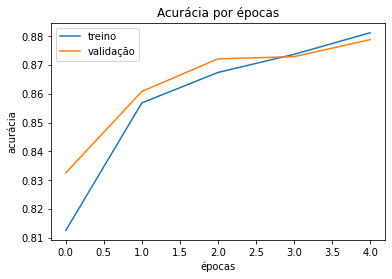

In [19]:
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acurácia por épocas')
plt.xlabel('épocas')
plt.ylabel('acurácia')
plt.legend(['treino', 'validação'])


Visualizando as perdas de treino e validação por época

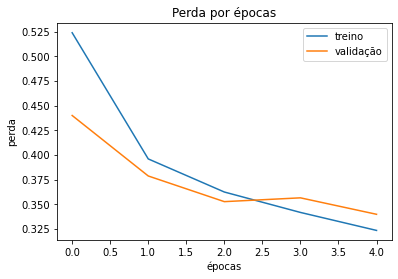

In [20]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Perda por épocas')
plt.xlabel('épocas')
plt.ylabel('perda')
plt.legend(['treino', 'validação'])

Testando o modelo e o modelo salvo

In [21]:
testes = modelo.predict(imagens_teste)
print('resultado teste:', np.argmax(testes[1]))
print('número da imagem de teste:', identificacoes_teste[1])

testes_modelo_salvo = modelo_salvo.predict(imagens_teste)
print('resultado teste modelo salvo:', np.argmax(testes_modelo_salvo[1]))
print('número da imagem de teste:', identificacoes_teste[1])

resultado teste: 2
número da imagem de teste: 2
resultado teste modelo salvo: 2
número da imagem de teste: 2


Avaliando o modelo

In [22]:
perda_teste, acuracia_teste = modelo.evaluate(imagens_teste, identificacoes_teste)
print('Perda do teste:', perda_teste)
print('Acurácia do teste:', acuracia_teste)

313/313 [==============================] - 0s 1ms/step - loss: 54.5463 - accuracy: 0.8533
Perda do teste: 54.546295166015625
Acurácia do teste: 0.8532999753952026
